#### Group by and Aggregate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
FFBD_tot = pd.read_csv('/Users/alexanderlarson/Desktop/Python Projects/Fantasy Football Rankings/Fantasyfb_Data/FFBD_tot.csv')

#### Creating Subsets for player position

In [2]:
dropcolumnsQBs = ['FantPos',
    'Tgt',
    'Rec',
    'Yds (Rec)',
    'Y/R',
    'TD (Rec)',
    'PPR_Tgt',
    'PPR (Rec)',
    'PPR_Rec']
dropcolumnsOther = ['FantPos',
    'Y/A (Pass)',
    'PPR (Pass)',
    'Cmp',
    'Att (Pass)',
    'Yds (Pass)',
    'TD (Pass)',
    'Int']
QBs = FFBD_tot[FFBD_tot['FantPos'] == 'QB'].drop(columns=dropcolumnsQBs)
RBs = FFBD_tot[FFBD_tot['FantPos'] == 'RB'].drop(columns=dropcolumnsOther)
WRs = FFBD_tot[FFBD_tot['FantPos'] == 'WR'].drop(columns=dropcolumnsOther)
TEs = FFBD_tot[FFBD_tot['FantPos'] == 'TE'].drop(columns=dropcolumnsOther)

#### Distribution of Player Age by Position

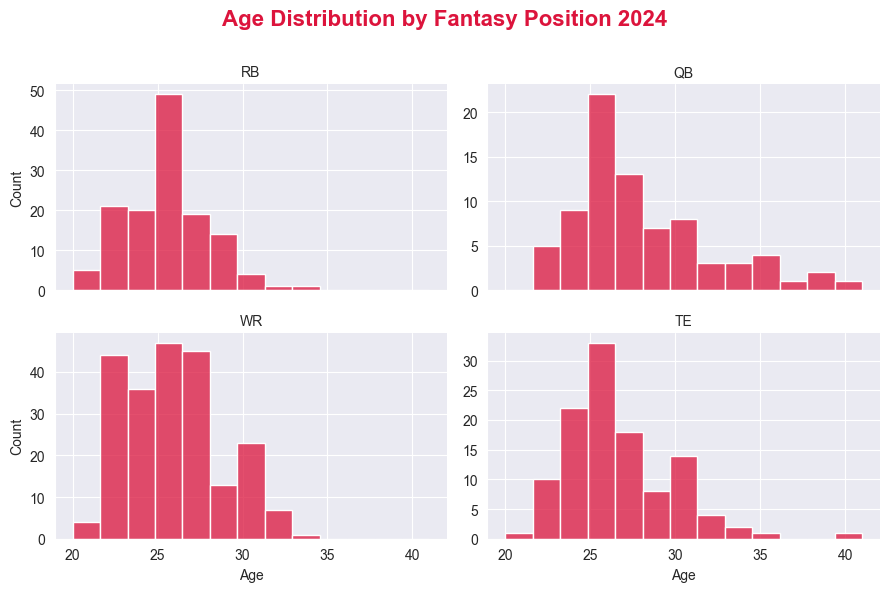

In [3]:
FFBD_2024 = FFBD_tot[FFBD_tot['Year'] == 2024]
sns.set_style('darkgrid')
g = sns.displot(
    data=FFBD_2024,
    x="Age",
    col="FantPos",
    col_wrap=2,
    bins=13,
    color="crimson",
    facet_kws={"sharex": True, "sharey": False},
    height=3,
    aspect=1.5
)

g.set_axis_labels("Age", "Count")
g.set_titles("{col_name}")
g.figure.suptitle("Age Distribution by Fantasy Position 2024", fontsize=16, fontweight='bold', color='crimson')
g.figure.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


#### Average PPR Scored per Snap by Position

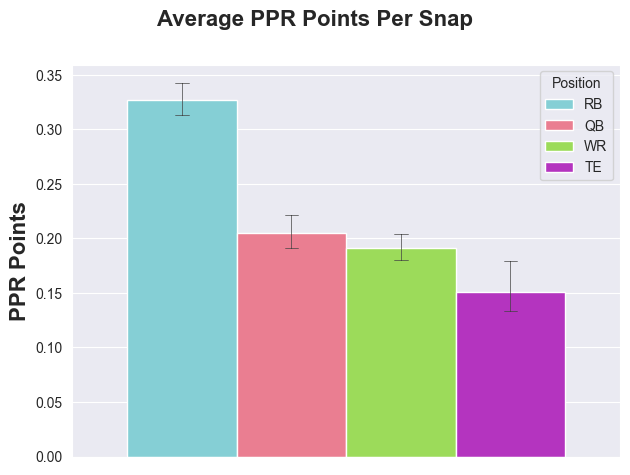

In [4]:
palette = ['#78DBE2', '#FC6C85', "#9DF045", "#C71DD6"]
b = sns.barplot(
    data=FFBD_tot,
    y='PPR_Snap',
    hue='FantPos',
    palette=palette,
    estimator='mean',
    legend='brief',
    capsize=0.1,
    err_kws={'linewidth':0.5}
)

# plt.title('Average Points Per Snap PPR', fontweight = 'bold', fontsize = 16, color = "#F08B1F")
b.set_ylabel('PPR Points', fontweight = 'bold', fontsize = 16)
b.figure.suptitle('Average PPR Points Per Snap', fontweight = 'bold', fontsize = 16)
plt.legend(title='Position')
plt.tight_layout(rect =[0,0,1,0.97])
plt.show()

#### Running Quarterback are Good for Fantasy. The following ols model shows that when controlling for relevant fantasy scoring statistics, every quarterback rush attempt is associated with a 0.77 PPR fantasy point increase.

In [7]:
import statsmodels.formula.api as smf

In [22]:
QBs = QBs.rename(columns={'Att (Rush)':'Att_Rush',
                          'Att (Pass)':'Att_Pass',
                          'Yds (Pass)':'Yds_Pass',
                          'Total Snaps': 'Total_Snaps'})
QB_reg = smf.ols('PPR ~ Att_Rush + Att_Pass + Yds_Pass + TD + Total_Snaps', data=QBs).fit()
print(QB_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPR   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     6413.
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:44:32   Log-Likelihood:                -2579.5
No. Observations:                 614   AIC:                             5171.
Df Residuals:                     608   BIC:                             5198.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.4220      0.999     -4.429      

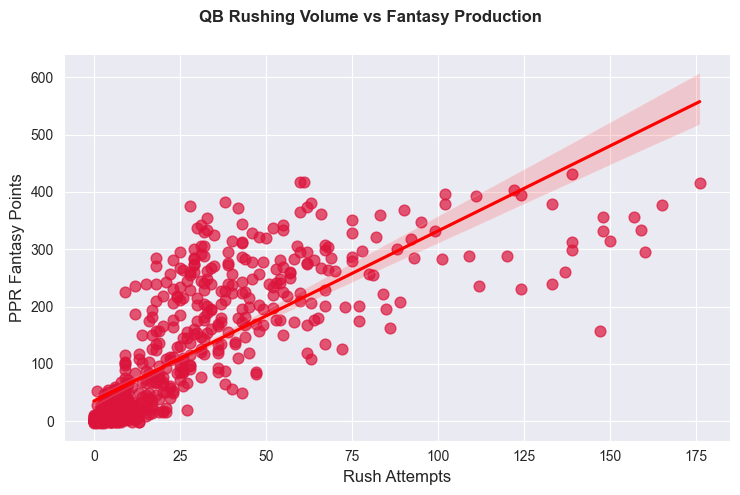

In [29]:
regplot = sns.lmplot(data=QBs,
                     x='Att_Rush',
                     y='PPR',
                     fit_reg=True,
                     aspect=1.5,
                     height=5,
                     scatter_kws={'s': 60,
                                  'color':'crimson',
                                  'alpha': 0.7,
                                  'marker': 'o'
                                 },
                     line_kws={'color':'red'})
regplot.set_axis_labels('Rush Attempts', 'PPR Fantasy Points', fontsize=12)
regplot.figure.suptitle('QB Rushing Volume vs Fantasy Production', fontweight='bold')
regplot.figure.tight_layout(rect=[0,0,1,0.98])
plt.show()

#### QB PPR Points Per Pass Attempt + Rush Attempt

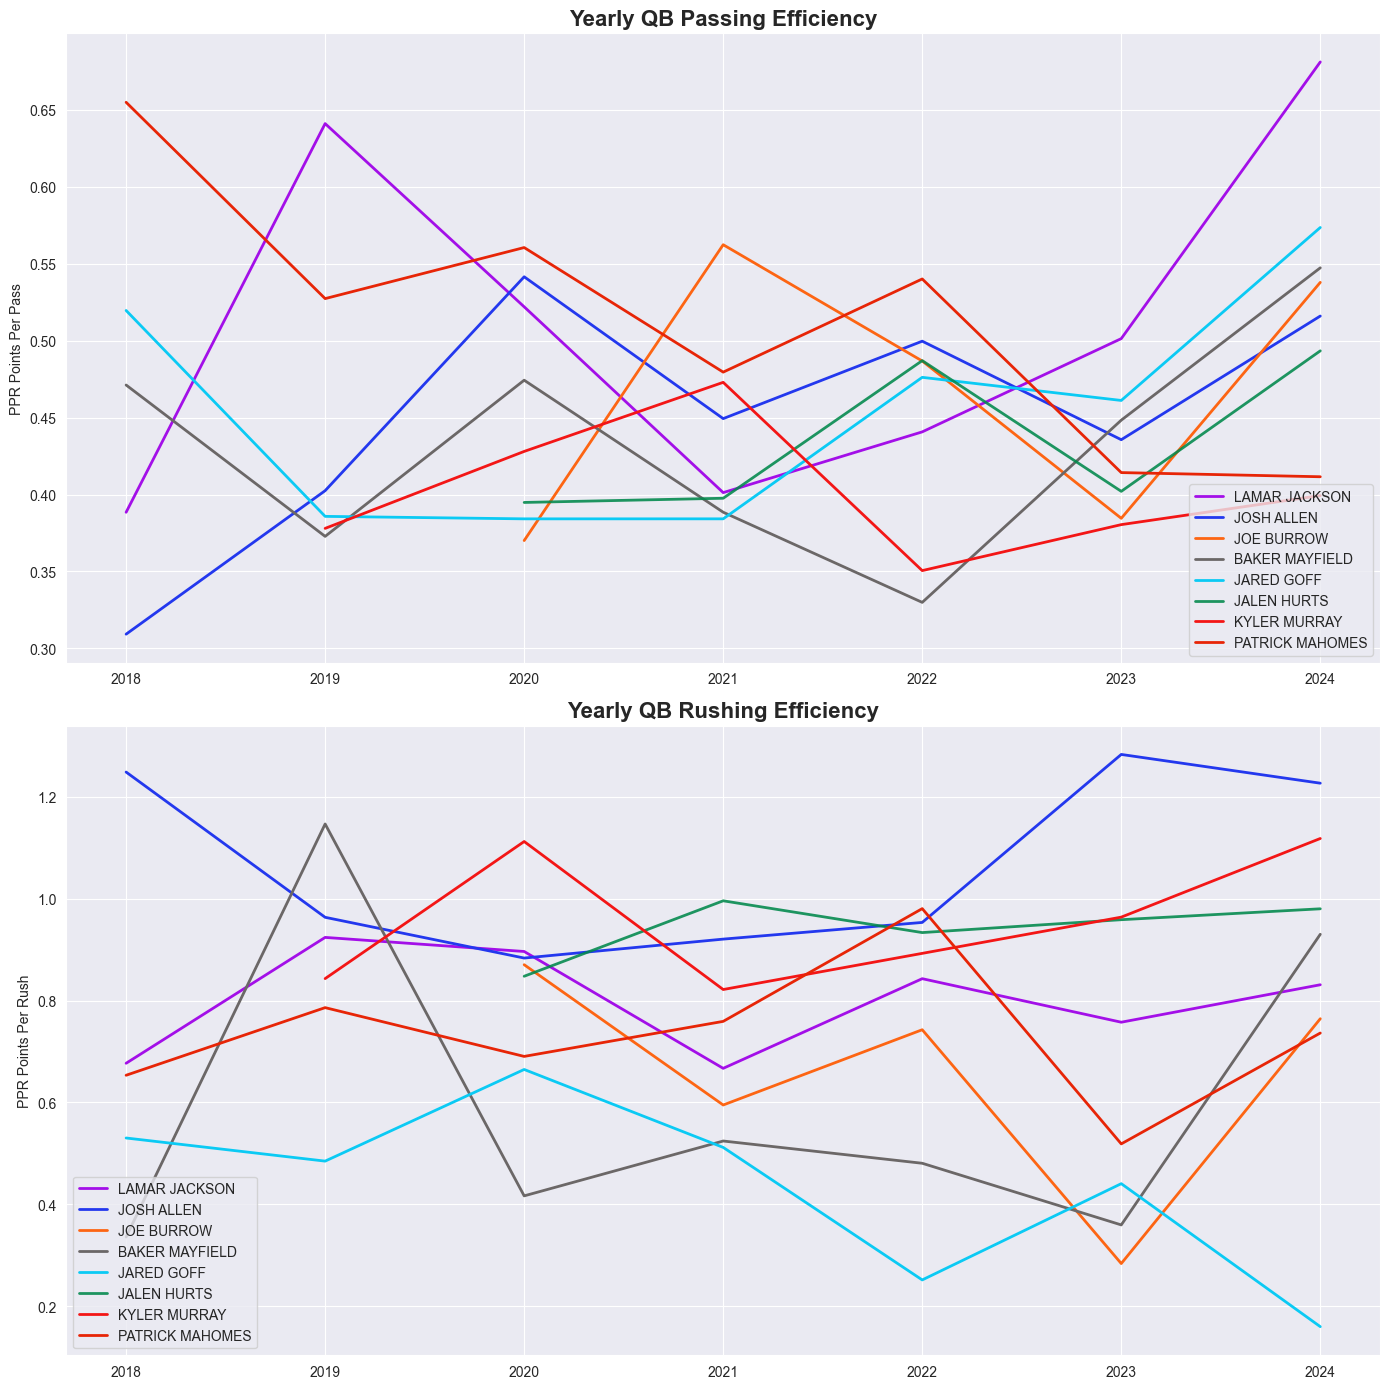

In [99]:
QBs_2024 = QBs[QBs['Year'] == 2024]
QB_Efficiency = QBs_2024.nlargest(10, 'PPR')
Relevant_QBs_2025 = ['LAMAR JACKSON',
                        'JOSH ALLEN',
                        'JOE BURROW',
                        'BAKER MAYFIELD',
                        'JARED GOFF',
                        'JALEN HURTS',
                        'PATRICK MAHOMES',
                        'KYLER MURRAY']
QBs_to_plot = QBs.loc[QBs['Player'].isin(Relevant_QBs_2025)]
QBs_to_plot = QBs_to_plot[QBs_to_plot['Year'] != 2017]
custom_palette = ["#A30FE8",
                  "#2338EE",
                  "#FD6513",
                  "#6B6767",
                  "#0BCAF4",
                  "#02894CE1",
                  "#F31616",
                  "#E72507",
                  ]
custom_hue = ["#F0C919",
              "#020B89"]
fig, ax = plt.subplots(2,1,figsize=(14,14))
sns.lineplot(data=QBs_to_plot,
                 x='Year',
                 y='PPR_PassAtt',
                 hue='Player',
                 palette=custom_palette,
                 linewidth=2,
                 ax=ax[0])
ax[0].legend(title='',
         title_fontsize=12,
         loc = 'lower right',
         bbox_to_anchor = (1,0)
         )
ax[0].set_title('Yearly QB Passing Efficiency', fontweight='bold', fontsize=16)
ax[0].set_ylabel('PPR Points Per Pass')
ax[0].set_xlabel('')

sns.lineplot(data=QBs_to_plot,
                 x='Year',
                 y='PPR_RushAtt',
                 hue='Player',
                 palette=custom_palette,
                 linewidth=2,
                 ax=ax[1])
ax[1].legend(title='',
         title_fontsize=12,
         loc = 'lower left',
        #  bbox_to_anchor = (0.3,0.05)
         )
ax[1].set_title('Yearly QB Rushing Efficiency', fontweight='bold', fontsize=16)
ax[1].set_ylabel('PPR Points Per Rush')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

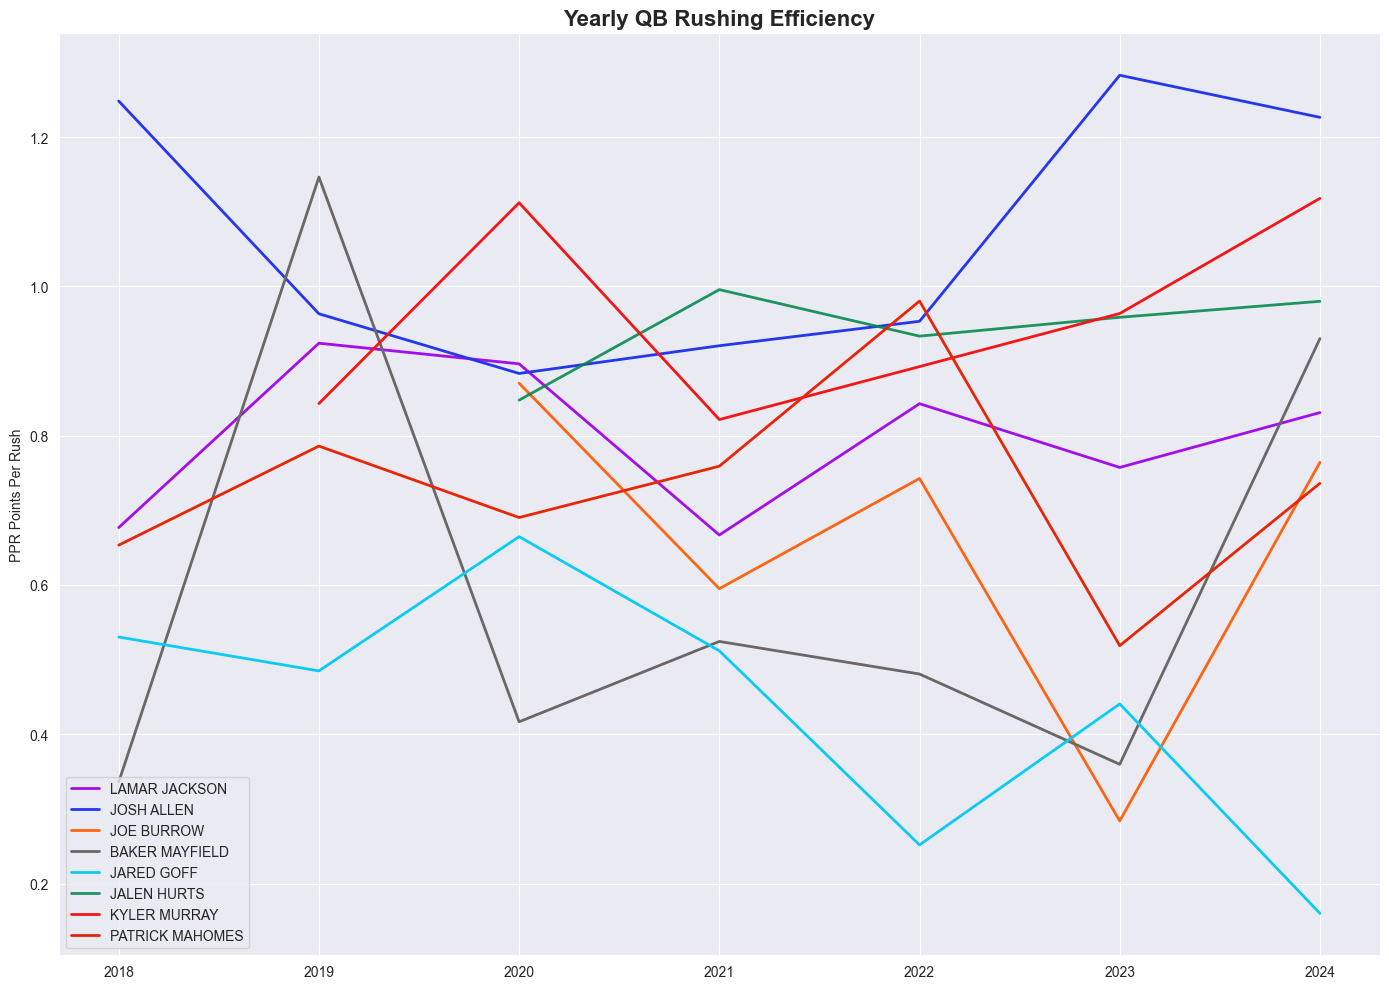

In [ ]:
h = sns.lineplot(data=QBs_to_plot,
                 x='Year',
                 y='PPR_RushAtt',
                 hue='Player',
                 palette=custom_palette,
                 markers='o',
                 linewidth=2)
h.legend(title='',
         title_fontsize=12,
         loc = 'lower left',
        #  bbox_to_anchor = (0.3,0.05)
         )
h.set_title('Yearly QB Rushing Efficiency', fontweight='bold', fontsize=16)
h.set_ylabel('PPR Points Per Rush')
h.set_xlabel('')
plt.tight_layout()
plt.show()